## **Assignment 6**
In this assignment, we will learn spectral clustering.

Import libraries.

In [ ]:
import warnings
warnings.filterwarnings("ignore") 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
from scipy.sparse import csgraph

# **Part 1** 

We will observe the spectral clustering on a synthetic *two-moons* dataset. Let's create the two-moons dataset, and visualize it.

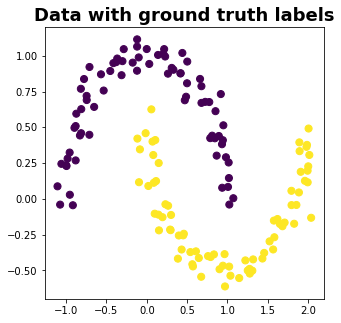

In [ ]:
X_mn, y_mn = make_moons(150, noise=.07, random_state=21)
cmap = 'viridis'
dot_size=50
fig = plt.figure(1, figsize=(5, 5))
plt.title('Data with ground truth labels', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_size, cmap=cmap)
plt.show()

**Problem 1 (20 pts):** Perform kmeans clustering with number of clusters = 2, and visualize the clusters.

In [ ]:
#INSERT CODE HERE

Looks like kmeans is not being able to separate the clusters properly. We will try spectral clustering now.

**Problem 2 (40 pts):** Perform spectral clustering by: 


1.   knn graph generation (num_neighbors = 8)
2.   Laplacian calculation
3.   Eigendecomposition of the Laplacian
4.   Sorting the eigenvalues and corresponding eigenvectors in ascending order
5.   Retrieve second eigenvector
6.   Assign class label = 1 if value in second eigenvector >= 0; class label = 2 otherwise
7.   Plot the data points with colors mapped from class label


In [ ]:
#INSERT CODES HERE
#Hint: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html#sklearn-neighbors-kneighbors-graph
A = #ENTER CODE HERE
A = #ENTER CODE HERE
nNodes = A.shape[0] 
L = #ENTER CODE HERE
e, v = #ENTER CODE HERE; e for eigenvalues, and v for eigenvectors
p = np.argsort(np.abs(e))[::1] #ascending sort of eigenvalues
v = v[:, p] #sorting the eigenvectors
v2 = #ENTER CODE HERE
cm = np.zeros((nNodes,1))
cm[#ENTER CODE HERE] = 1
cm[#ENTER CODE HERE] = 2
fig = plt.figure(3, figsize=(5, 5))
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=cm)
plt.show()

Looks like we got perfect clustering ! Please check it with Sklearn's library result.

In [ ]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=1)
labels = model.fit_predict(X_mn)
fig = plt.figure(4, figsize=(5, 5))
plt.title('Sklearn\'s default spectral clustering', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labels, s=dot_size)
plt.show()

Great ! We did almost similar clustering as Sklearn's default.

---

# **Part 2**

Upload the file *Dataset2Edges.txt* (from Canvas) in '*Contents*' folder. The file is an edge list. We will read it as a graph. The graph has 75 nodes and 188 edges.



In [ ]:
G = nx.read_edgelist("Dataset2Edges.txt")
print(G.number_of_nodes(), G.number_of_edges())

Let's visualize the graph. The graph has 4 desity-based communities.

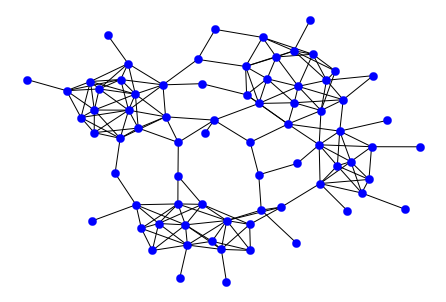

In [ ]:
nx.draw(G, pos = nx.nx_pydot.graphviz_layout(G, prog="neato"), node_size=70, node_color='blue', linewidths=0.25, with_labels=False)

**Problem 3 (40 pts):** Perform spectral clustering and kmeans to identify four clusters/communities.


1.   Compute the Laplacian
2.   Eigendecompose the Laplacian
3.   Sort the eigenvalues and corresponding eigenvectors in ascending order
4.   Retrieve first 4 eigenvectors.
5.   Perform kmeans (num_clusters = 4) on first 4 eigenvectors.
6.   Assign node colors by the kmeans labels.
7.   Draw the graph with corresponding node colors. 




In [ ]:
#INSERT CODES HERE
A = #ENTER CODE HERE
A = #ENTER CODE HERE
L = #ENTER CODE HERE
e, v = #ENTER CODE HERE
p = #ENTER CODE HERE  
v = #ENTER CODE HERE
v1_4 = #ENTER CODE HERE
kmeans = #ENTER CODE HERE
cm = kmeans.labels_
color_map = []
for i in range(0, A.shape[0]):
  color_code = #ENTER CODE HERE
  if (color_code == 0):
    color_map.append('red')
  elif (color_code == 1):
    color_map.append('green')
  elif (color_code == 2):
    color_map.append('blue')
  else:
    color_map.append('yellow')
nx.draw(G, pos = nx.nx_pydot.graphviz_layout(G, prog="neato"), node_size=70, node_color=color_map, linewidths=0.25, with_labels=False)